In [ ]:
#Importar los datos
import pandas as pd

file_path = 'train.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,substation,date,consumption
0,AJAHUEL,2018-01-01 00:00:00,137.330840
1,AJAHUEL,2018-01-01 01:00:00,124.045549
2,AJAHUEL,2018-01-01 02:00:00,118.137811
3,AJAHUEL,2018-01-01 03:00:00,107.899499
4,AJAHUEL,2018-01-01 04:00:00,100.362069


In [ ]:
# Se convierte la columna fecha a un datetime
data['date'] = pd.to_datetime(data['date'])

# estadisticas
overall_stats = data['consumption'].describe()

# ----por sub-estación
substation_stats = data.groupby('substation')['consumption'].describe()

substation_stats


,count,mean,std,min,25%,50%,75%,max
substation,,,,,,,,
AJAHUEL,34913.0,157.707850,53.688217,-159.019095,119.887099,156.714029,194.042396,348.887471
BUIN,34913.0,-1.378856,1.848379,-199.000000,-1.569775,-1.390393,-1.138371,6.623003
CHENA,34913.0,191.423875,48.962242,-74.498545,154.870760,193.548373,228.953700,486.400665
CNAVIA,34913.0,358.862934,109.495187,-92.670096,280.748739,356.849990,439.677918,752.006309
ELSALTO,34913.0,370.651085,124.571119,0.000000,280.676014,367.540255,463.928697,749.894004
FLORIDA,34913.0,-1.833216,11.649272,-77.782766,-6.928774,-3.949819,0.433912,91.916941
LOSALME,34913.0,181.402494,50.377007,-1.026872,144.974119,180.373357,216.999209,353.607154


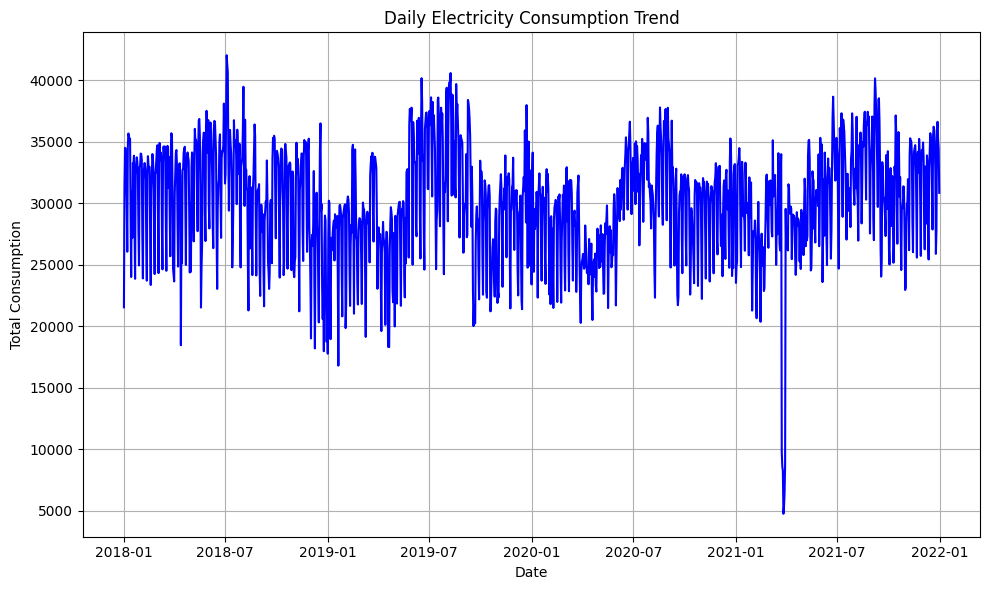

In [ ]:
import matplotlib.pyplot as plt

#Consumo por día
daily_consumption = data.resample('D', on='date')['consumption'].sum()

# Plot para el consumo
plt.figure(figsize=(10, 6))
plt.plot(daily_consumption.index, daily_consumption.values, color='blue')
plt.title('Daily Electricity Consumption Trend')
plt.xlabel('Date')
plt.ylabel('Total Consumption')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Calcular el promedio para cada subestación
mean_consumption_per_substation = data.groupby('substation')['consumption'].mean()

mean_consumption_per_substation

,consumption
substation,
AJAHUEL,157.707850
BUIN,-1.378856
CHENA,191.423875
CNAVIA,358.862934
ELSALTO,370.651085
FLORIDA,-1.833216
LOSALME,181.402494


In [ ]:
# Buscar la que tiene el consumo promedio más alto
max_avg_substation = mean_consumption_per_substation.idxmax()
max_avg_value = mean_consumption_per_substation.max()

max_avg_substation, max_avg_value

('ELSALTO', 370.6510845681551)

In [ ]:
#La que tiene el menor consumo promedio

min_avg_substation = mean_consumption_per_substation.idxmin()
min_avg_value = mean_consumption_per_substation.min()

min_avg_substation, min_avg_value

('FLORIDA', -1.8332157419585826)

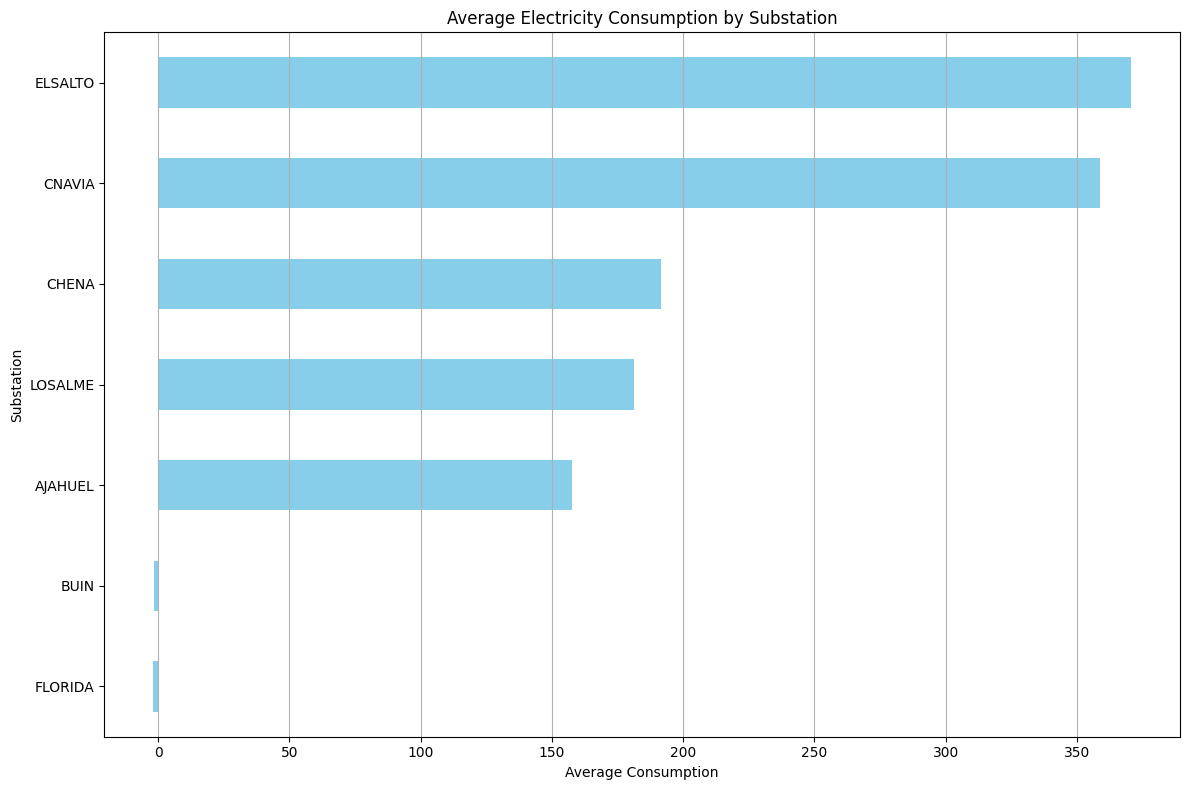

In [ ]:
# Plot del consumo promedio por subestación
plt.figure(figsize=(12, 8))
mean_consumption_per_substation.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Electricity Consumption by Substation')
plt.xlabel('Average Consumption')
plt.ylabel('Substation')
plt.grid(axis='x')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#15 Días con los consumos más altos
top_consumption_days = daily_consumption.nlargest(15)

top_consumption_days


,consumption
date,
2018-07-04,42036.342368
2018-07-05,41279.545829
2018-07-06,40675.188326
2019-08-09,40590.395799
2019-06-18,40172.681621
2021-09-07,40160.266481
2019-08-07,39855.995585
2019-08-08,39738.609972
2019-08-19,39695.689254


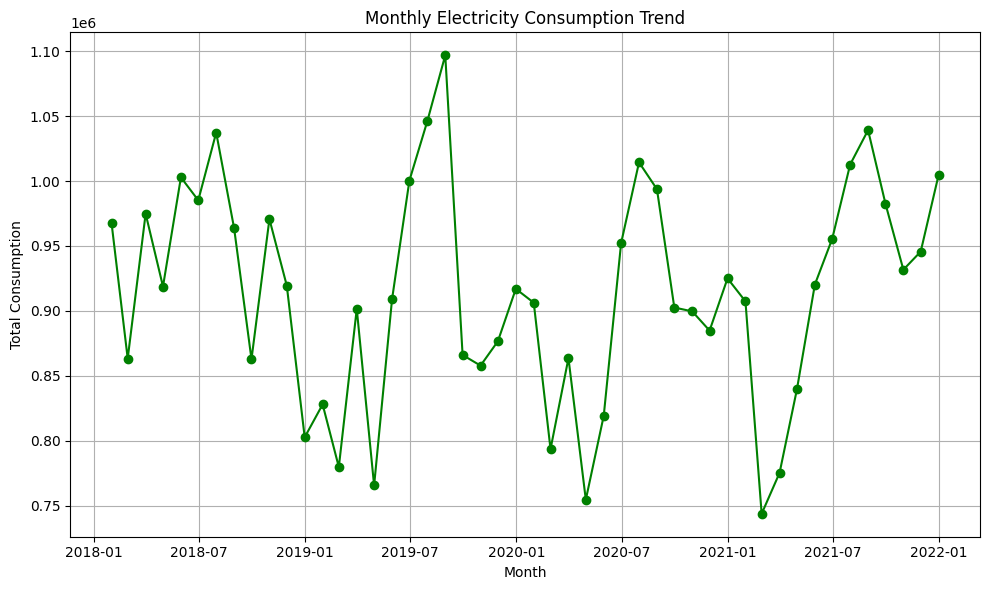

In [ ]:
# Consumo por mes
monthly_consumption = data.resample('M', on='date')['consumption'].sum()

# Plot para el consumo mensual
plt.figure(figsize=(10, 6))
plt.plot(monthly_consumption.index, monthly_consumption.values, marker='o', color='green')
plt.title('Monthly Electricity Consumption Trend')
plt.xlabel('Month')
plt.ylabel('Total Consumption')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


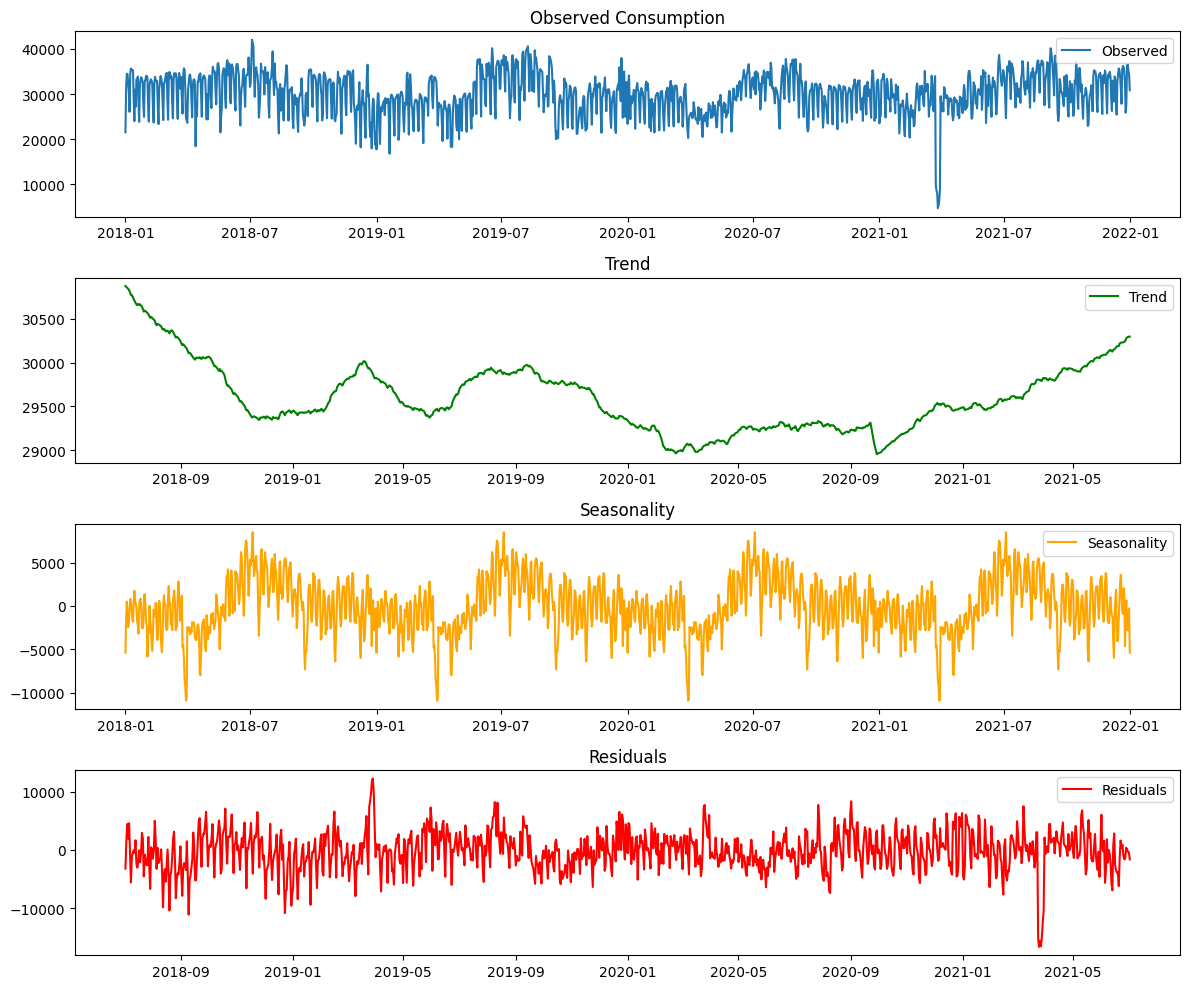

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


daily_consumption = data.resample('D', on='date')['consumption'].sum()

# Descomposición
decomposition = seasonal_decompose(daily_consumption, model='additive', period=365)

# Plotting the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed Consumption')
plt.legend(loc='upper right')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend')
plt.legend(loc='upper right')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonality')
plt.legend(loc='upper right')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


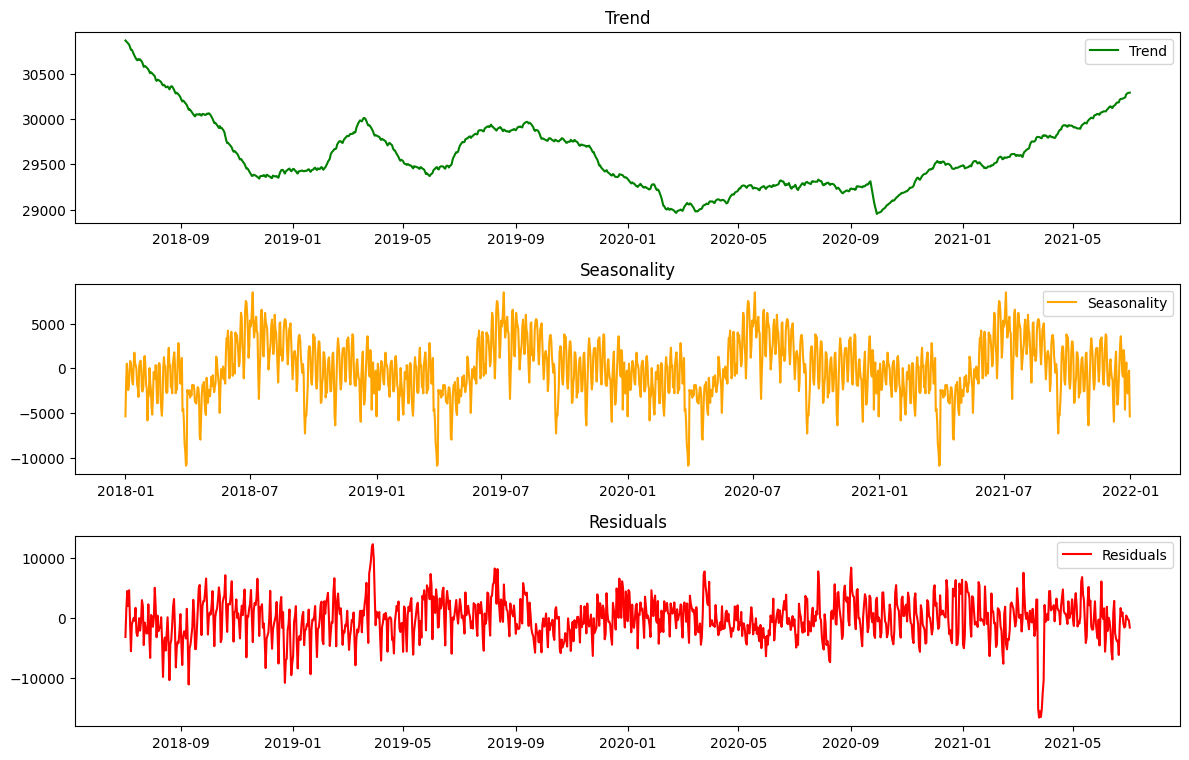

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


daily_consumption = data.resample('D', on='date')['consumption'].sum()

# Descomposición
decomposition = seasonal_decompose(daily_consumption, model='additive', period=365)

# Plotting the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend')
plt.legend(loc='upper right')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonality')
plt.legend(loc='upper right')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

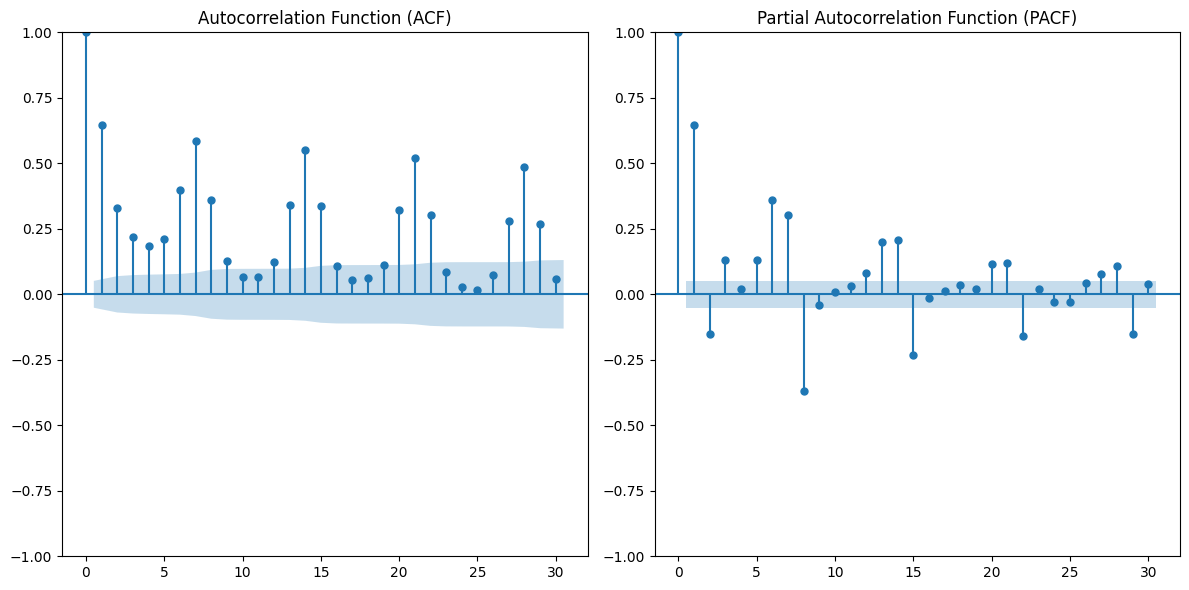

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calcular la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF)
acf_vals = acf(daily_consumption, nlags=30)
pacf_vals = pacf(daily_consumption, nlags=30)

# Graficar la ACF y la PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(daily_consumption, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plot_pacf(daily_consumption, lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Aplicar la prueba de Dickey-Fuller a los datos de consumo diario
result = adfuller(daily_consumption)

# Imprimir los resultados de la prueba
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretar los resultados
if result[1] <= 0.05:
  print("La serie de tiempo es estacionaria.")
else:
  print("La serie de tiempo no es estacionaria.")


ADF Statistic: -4.335907117231987
p-value: 0.00038473633197471985
Critical Values: {'1%': -3.4349024693573584, '5%': -2.8635506057382325, '10%': -2.5678404322793846}
La serie de tiempo es estacionaria.


In [ ]:
#Importar los datos
import pandas as pd

file_path = 'test.csv'
data = pd.read_csv(file_path)

In [ ]:
data['date'] = pd.to_datetime(data['date'])

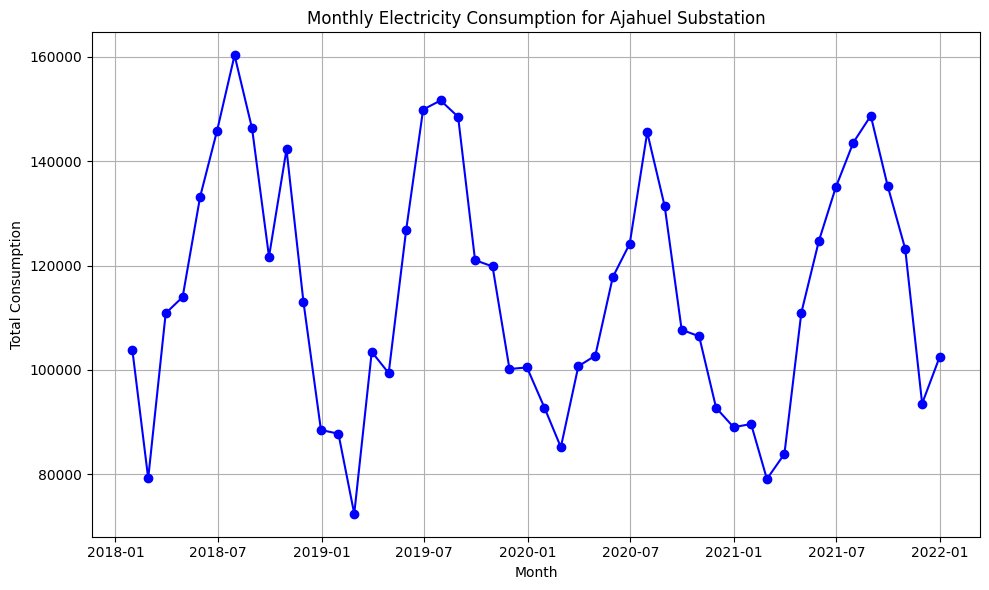

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los datos para la subestación 'ajahuel'
ajahuel_data = data[data['substation'] == 'AJAHUEL']
# Calcular el consumo mensual para 'ajahuel'
monthly_consumption_ajahuel = ajahuel_data.resample('M', on='date')['consumption'].sum()
# Crear el plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_consumption_ajahuel.index, monthly_consumption_ajahuel.values, marker='o', color='blue')
plt.title('Monthly Electricity Consumption for Ajahuel Substation')
plt.xlabel('Month')
plt.ylabel('Total Consumption')
plt.grid(True)
plt.tight_layout()

# Mostrar el plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
# Cargar los datos
data = pd.read_csv('train.csv')

# Convertir la columna 'date' a formato datetime
data['date'] = pd.to_datetime(data['date'])

In [ ]:

# Resampleo de datos para obtener el consumo diario (sumar por día)
daily_consumption = data.resample('D', on='date')['consumption'].sum()

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_consumption.values.reshape(-1, 1))

In [ ]:
# Preparar los datos para la RNN
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

look_back = 60

In [ ]:
X, y = create_dataset(scaled_data, look_back)

# Redimensionar los datos para LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Construir el modelo LSTM ajustado
model = Sequential()

# Primera capa LSTM con más unidades y Dropout
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))

# Segunda capa LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.3))


# Capa de salida
model.add(Dense(units=1))


# Compilar el modelo con el optimizador Adam
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Configurar Early Stopping: detener si no mejora el valor de validación en 9 épocas consecutivas
early_stop = EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True)

# Entrenar el modelo con Early Stopping
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0204 - val_loss: 0.0144
Epoch 2/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0172 - val_loss: 0.0143
Epoch 3/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0165 - val_loss: 0.0156
Epoch 4/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0184 - val_loss: 0.0143
Epoch 5/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0167 - val_loss: 0.0149
Epoch 6/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0178 - val_loss: 0.0148
Epoch 7/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0169 - val_loss: 0.0168
Epoch 8/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161 - val_loss: 0.0146
Epoch 9/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0162 - val_loss: 0.0140
Epoch 10/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161 - val_loss: 0.0169
Epoch 11/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0156 - val_loss: 0.0138
Epoch 12/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


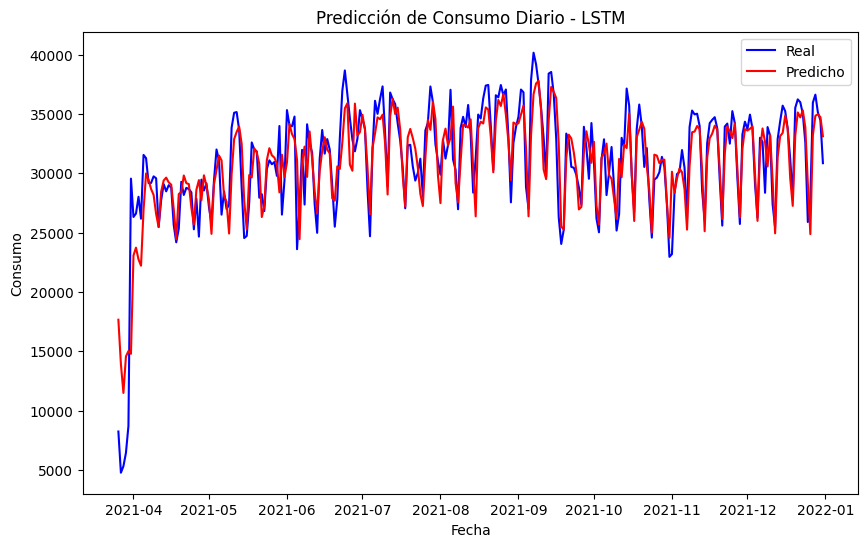

In [ ]:
# Evaluar el rendimiento
predicted_consumption = model.predict(X_test)
predicted_consumption = scaler.inverse_transform(predicted_consumption)

# Calcular métricas de rendimiento
y_test_descaled = scaler.inverse_transform(y_test.reshape(-1, 1))
mse = mean_squared_error(y_test_descaled, predicted_consumption)
mae = mean_absolute_error(y_test_descaled, predicted_consumption)
r2 = r2_score(y_test_descaled, predicted_consumption)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(daily_consumption.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real')
plt.plot(daily_consumption.index[-len(y_test):], predicted_consumption, color='red', label='Predicho')
plt.title('Predicción de Consumo Diario - LSTM')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.show()

In [ ]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 6322088.82989486
Mean Absolute Error (MAE): 1745.7705572726868
R-squared (R²): 0.7389881036544864


In [ ]:
model.save("modelo3-r2-0-7389.h5")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Cargar los datos de prueba desde un archivo CSV
test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)

In [ ]:

# Si tienes una columna de fecha, asegúrate de convertirla al formato de fecha
test_data['date'] = pd.to_datetime(test_data['date'])

# Escoger la columna de consumo y preprocesar los datos (ajustar si tienes otro nombre de columna)
test_consumption = test_data['consumption'].values

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_test_data = scaler.fit_transform(test_consumption.reshape(-1, 1))


In [ ]:
# Preparar los datos para la entrada al modelo LSTM (con look_back de 60)
def create_test_dataset(dataset, look_back=60):
    X_test = []
    for i in range(look_back, len(dataset)):
        X_test.append(dataset[i-look_back:i, 0])
    return np.array(X_test)

look_back = 60
X_test = create_test_dataset(scaled_test_data, look_back)

In [ ]:
from tensorflow.keras.models import load_model

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Cargar el modelo guardado
model = load_model('modelo3-r2-0-7389.h5')

# Predecir los valores de consumo con el modelo
predicted_test_consumption = model.predict(X_test)

# Desescalar los valores predichos
predicted_test_consumption_descaled = scaler.inverse_transform(predicted_test_consumption)

# Desescalar los valores reales de prueba para comparación
y_test_descaled = scaler.inverse_transform(scaled_test_data[look_back:])

# Evaluar el modelo con métricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test_descaled, predicted_test_consumption_descaled)
mae = mean_absolute_error(y_test_descaled, predicted_test_consumption_descaled)
r2 = r2_score(y_test_descaled, predicted_test_consumption_descaled)

1915/1915 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


In [ ]:
print(f"Mean Squared Error (MSE): {round(mse,2)}")
print(f"Mean Absolute Error (MAE): {round(mae,2)}")
print(f"R-squared (R²): {round(r2,2)}")

Mean Squared Error (MSE): 12056.07
Mean Absolute Error (MAE): 99.29
R-squared (R²): 0.78


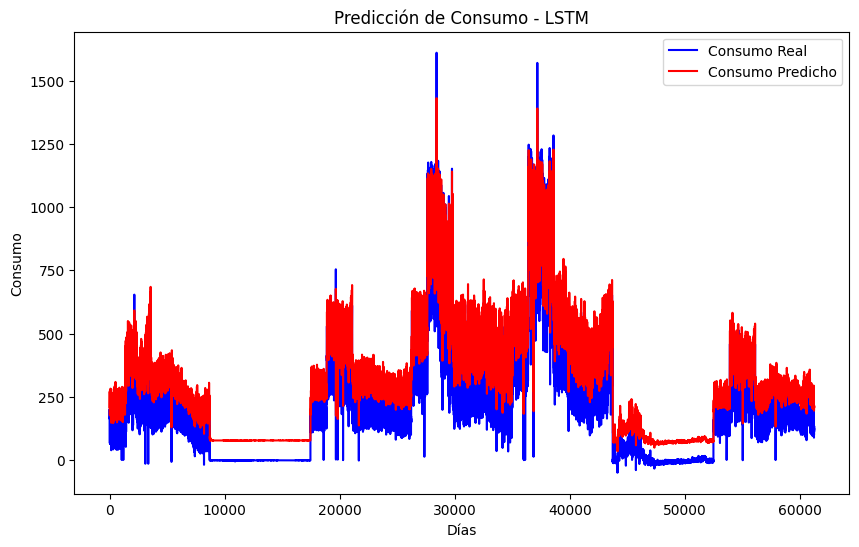

In [ ]:
#Plot predicción vs/ valores reales
plt.figure(figsize=(10,6))
plt.plot(y_test_descaled, color='blue', label='Consumo Real')
plt.plot(predicted_test_consumption_descaled, color='red', label='Consumo Predicho')
plt.title('Predicción de Consumo - LSTM')
plt.xlabel('Días')
plt.ylabel('Consumo')
plt.legend()
plt.show()

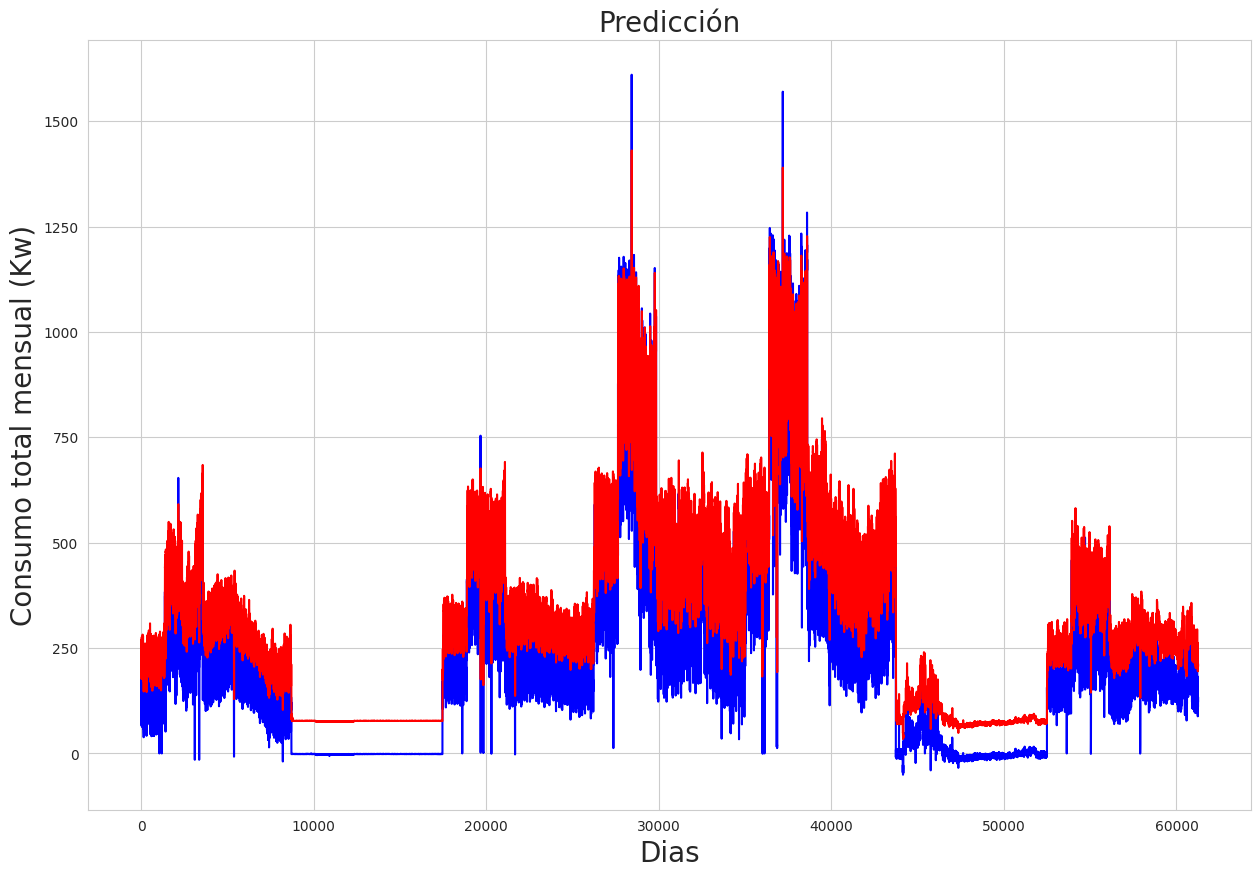

In [ ]:
import seaborn as sns

nombre = 'consumo_predicho'
titulo = 'Predicción'

plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
plt.plot(y_test_descaled, color='blue', label='Consumo Real')
plt.plot(predicted_test_consumption_descaled, color='red', label='Consumo Predicho')
plt.xlabel('Dias', fontsize = 20)
plt.ylabel('Consumo total mensual (Kw)' , fontsize = 20)
plt.title(titulo , fontsize = 20)
#plt.fill_between(x_p,modelo_ci[:,0],modelo_ci[:,1],color="b",alpha=.15)
#plt.legend(title = f"RMSE : {RMSE :.2f}",  fontsize = 20)
plt.savefig(nombre, dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulando valores de prueba (reemplaza con tus propios datos)
# y_test_descaled y predicted_test_consumption_descaled son ejemplos
y_test_descaled = np.random.randn(1000)  # Valores reales de prueba
predicted_test_consumption_descaled = y_test_descaled + np.random.normal(0, 0.2, 1000)  # Valores predichos con algo de ruido

# Calcula el error
error = predicted_test_consumption_descaled - y_test_descaled

# Inicializar las bandas de error
min_err = np.empty(predicted_test_consumption_descaled.shape)
pls_err = np.empty(predicted_test_consumption_descaled.shape)

# Tamaño del lote para reducir el uso de memoria
batch_size = 100

# Calcular las bandas de error en lotes
for i in range(0, len(predicted_test_consumption_descaled), batch_size):
    end_idx = min(i + batch_size, len(predicted_test_consumption_descaled))  # Para no exceder el tamaño del array
    min_err[i:end_idx] = predicted_test_consumption_descaled[i:end_idx].flatten() - error[i:end_idx]
    pls_err[i:end_idx] = predicted_test_consumption_descaled[i:end_idx].flatten() + error[i:end_idx]




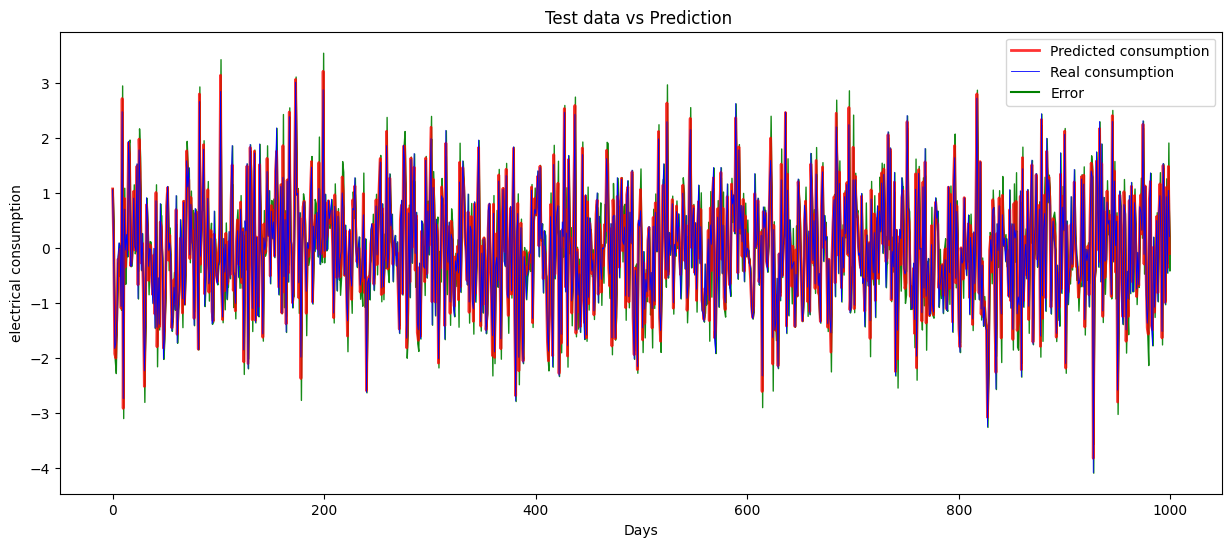

In [33]:
# Dibuja el gráfico
plt.figure(figsize=(15, 6))



plt.plot(predicted_test_consumption_descaled, color='red', linewidth=2, alpha=0.8, label='Predicted consumption')

plt.plot(y_test_descaled, color='blue', label='Real consumption',linewidth=0.6)

plt.plot([], [], label='Error', color='green')

plt.fill_between(range(len(predicted_test_consumption_descaled)),
                 min_err, pls_err, color='green', alpha=0.9)

# Etiquetas y leyenda
plt.title('Test data vs Prediction ')
plt.xlabel('Days')
plt.ylabel('electrical consumption')
plt.legend()
plt.show()

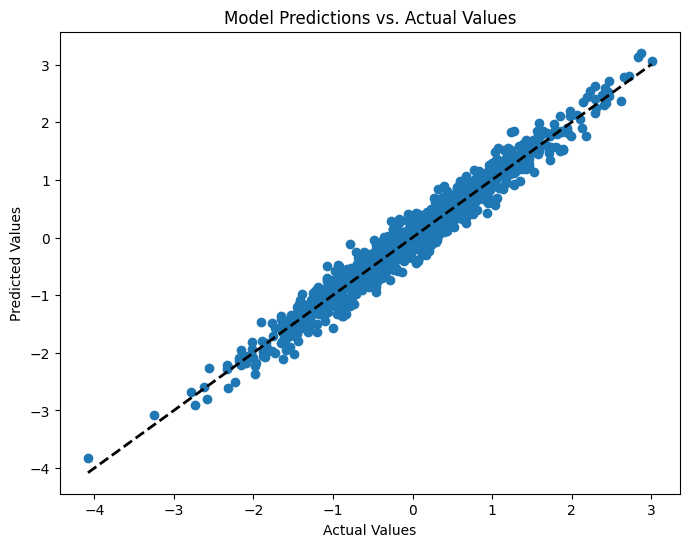

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_descaled, predicted_test_consumption_descaled)
plt.plot([y_test_descaled.min(), y_test_descaled.max()], [y_test_descaled.min(), y_test_descaled.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs. Actual Values')
plt.show()